## Reduction of order

Up to this point, we have only discussed first-order differential equations. Higher order differential equations can be reduced to a system of first order equations by defining new unknowns:

$$ \begin{align}
y^{\prime\prime} &= f(x, y, y^\prime)
\end{align} $$

Let $z = y^\prime$, such that

$$ \begin{align}
z^{\prime} &= f(x, y, z) \\
y^{\prime} &= z
\end{align} $$

which is solved as a system of equations as above.



#### Example: Swinging pendulum

The equation of motion of a swinging pendulum is,
$$ ml \frac{d^2\Theta(t)}{dt^2} = -m g \sin\big( \Theta(t) \big)$$

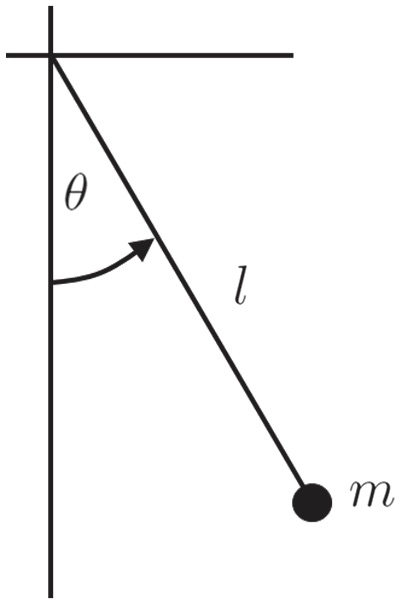

Use the reduction of order to write:

$$ \vec{y} = \begin{bmatrix} \Theta(t) \\ \dot{\Theta}(t) \end{bmatrix} $$

$$\frac{d\vec{y}}{dt} = \begin{bmatrix} \dot{\Theta}(t) \\ \ddot{\Theta}(t) \end{bmatrix} = \begin{bmatrix} y_2 \\ g \sin(y_1)/l  \end{bmatrix}  = \vec{f}(t, \vec{y})$$

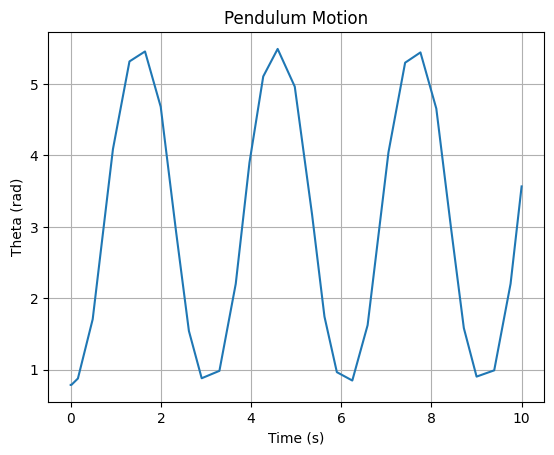

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

# Define the system of differential equations
def f(t, y):
  theta, theta_dot = y
  g = 9.81  # Acceleration due to gravity (m/s^2)
  l = 1.0   # Length of the pendulum (m)
  dydt = [theta_dot, (g/l) * np.sin(theta)]
  return np.array(dydt)

# Initial conditions
theta0 = np.pi/4  # Initial angle (radians)
theta_dot0 = 0.0  # Initial angular velocity (rad/s)

# Time span
t_span = (0, 10)

# Solve using RK45
sol = solve_ivp(f, t_span, [theta0, theta_dot0], method='RK45')

# Plot the results
plt.plot(sol.t, sol.y[0, :])
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Pendulum Motion')
plt.grid(True)
plt.show()